In [1]:
# menggunakan library yang dibutuhkan
import pandas as pd
from sklearn.linear_model import LinearRegression

# Isi data proyeksi penduduk Surabaya tahun 2015 - 2017
data = {
    'Umur': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+'],
    'Laki-laki 2015': [111201, 111623, 99278, 110362, 139306, 133932, 129848, 120425, 106659, 92903, 81003, 65757, 44090, 28818, 16880, 14598],
    'Laki-laki 2016': [110135, 110860, 99119, 110433, 140774, 134336, 128948, 119482, 106812, 93958, 82482, 67692, 46356, 30198, 17379, 15061],
    'Laki-laki 2017': [109050, 109826, 99010, 109994, 142348, 135105, 127761, 118681, 106631, 94691, 84000, 69330, 48473, 31911, 17831, 15540],
    'Perempuan 2015': [106672, 106287, 95548, 120346, 145337, 134235, 132147, 121232, 108883, 99582, 87965, 68888, 42773, 29225, 19301, 23479],
    'Perempuan 2016': [105578, 105819, 95294, 120129, 145919, 134129, 130778, 120745, 108986, 100469, 89959, 72043, 44813, 30107, 19619, 23994],
    'Perempuan 2017': [104540, 105041, 95237, 119670, 146566, 134508, 129034, 120417, 108941, 101080, 91823, 74874, 47252, 31051, 19986, 24497]
}

# Membuat DataFrame dari data proyeksi penduduk
df = pd.DataFrame(data)

# Menghitung total penduduk per tahun
df['Total 2015'] = df['Laki-laki 2015'] + df['Perempuan 2015']
df['Total 2016'] = df['Laki-laki 2016'] + df['Perempuan 2016']
df['Total 2017'] = df['Laki-laki 2017'] + df['Perempuan 2017']

# Membuat DataFrame untuk hasil prediksi
pred_data = {
    'Umur': df['Umur'],
    'Laki-laki 2018': [],
    'Laki-laki 2019': [],
    'Laki-laki 2020': [],
    'Perempuan 2018': [],
    'Perempuan 2019': [],
    'Perempuan 2020': []
}

# Melakukan prediksi proyeksi penduduk untuk tahun 2018-2020
for i, row in df.iterrows():
    X = [[2015], [2016], [2017]]
    y_laki = [row['Laki-laki 2015'], row['Laki-laki 2016'], row['Laki-laki 2017']]
    y_perempuan = [row['Perempuan 2015'], row['Perempuan 2016'], row['Perempuan 2017']]

    # Melakukan regresi linier untuk laki-laki
    reg_laki = LinearRegression()
    reg_laki.fit(X, y_laki)
    pred_laki = reg_laki.predict([[2018], [2019], [2020]])

    # Melakukan regresi linier untuk perempuan
    reg_perempuan = LinearRegression()
    reg_perempuan.fit(X, y_perempuan)
    pred_perempuan = reg_perempuan.predict([[2018], [2019], [2020]])

    # Menyimpan hasil prediksi pada DataFrame hasil
    pred_data['Laki-laki 2018'].append(pred_laki[0])
    pred_data['Laki-laki 2019'].append(pred_laki[1])
    pred_data['Laki-laki 2020'].append(pred_laki[2])
    pred_data['Perempuan 2018'].append(pred_perempuan[0])
    pred_data['Perempuan 2019'].append(pred_perempuan[1])
    pred_data['Perempuan 2020'].append(pred_perempuan[2])

# Membuat DataFrame hasil prediksi
pred_df = pd.DataFrame(pred_data)

# Menggabungkan data proyeksi dan hasil prediksi
result_df = pd.concat([df, pred_df], axis=1)

# Menampilkan tabel hasil prediksi
print(result_df)

     Umur  Laki-laki 2015  Laki-laki 2016  Laki-laki 2017  Perempuan 2015  \
0     0-4          111201          110135          109050          106672   
1     5-9          111623          110860          109826          106287   
2   10-14           99278           99119           99010           95548   
3   15-19          110362          110433          109994          120346   
4   20-24          139306          140774          142348          145337   
5   25-29          133932          134336          135105          134235   
6   30-34          129848          128948          127761          132147   
7   35-39          120425          119482          118681          121232   
8   40-44          106659          106812          106631          108883   
9   45-49           92903           93958           94691           99582   
10  50-54           81003           82482           84000           87965   
11  55-59           65757           67692           69330           68888   

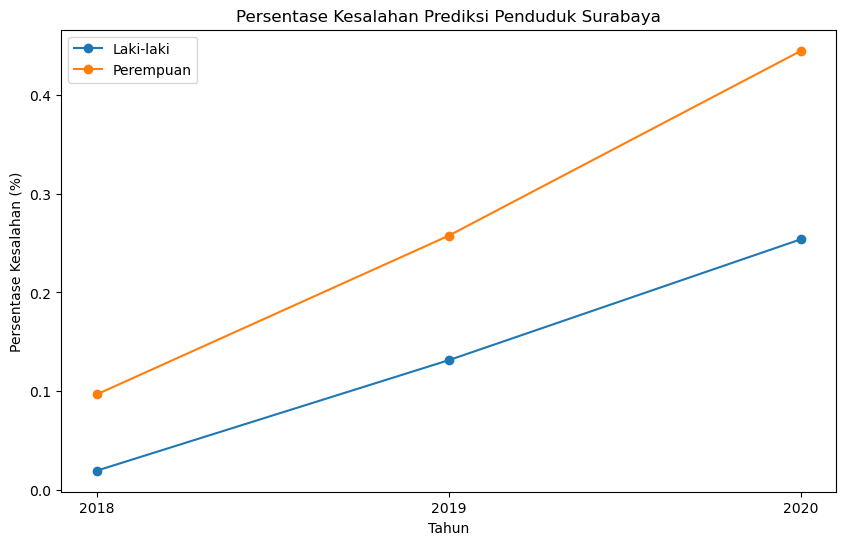

In [2]:
# menggunakan library yang dibutuhkan
import matplotlib.pyplot as plt

# Data aktual proyeksi penduduk 2018-2020
actual_data = {
    'Laki-laki': [107999, 107043, 106096],
    'Perempuan': [103565, 102663, 101785]
}

# Data hasil prediksi
predicted_data = {
    'Laki-laki': [107977.67, 106902.17, 105826.67],
    'Perempuan': [103464.67, 102398.67, 101332.67]
}

# Menghitung persentase kesalahan prediksi
error_percentage = {}
for gender in actual_data:
    actual = actual_data[gender]
    predicted = predicted_data[gender]
    error = [abs((a - p) / a * 100) for a, p in zip(actual, predicted)]
    error_percentage[gender] = error

# Mengatur label usia
ages = ['2018', '2019', '2020']

# Plot grafik persentase kesalahan prediksi
plt.figure(figsize=(10, 6))

plt.plot(ages, error_percentage['Laki-laki'], marker='o', label='Laki-laki')
plt.plot(ages, error_percentage['Perempuan'], marker='o', label='Perempuan')

plt.title('Persentase Kesalahan Prediksi Penduduk Surabaya')
plt.xlabel('Tahun')
plt.ylabel('Persentase Kesalahan (%)')
plt.legend()

plt.show()